In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pairs_data = pd.read_csv('pair_data_nf_accounting.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3526: DtypeWarning: Columns (3,11,12,13,14,15,16,17,23,25,26,27,28,34,36,37,40,41,42,55,56,57,70,71,75,76) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
pairs_id = list(set(pairs_data['pair_id'].to_list()))
print(f'Number of pairs: {len(pairs_id)}')

Number of pairs: 4424


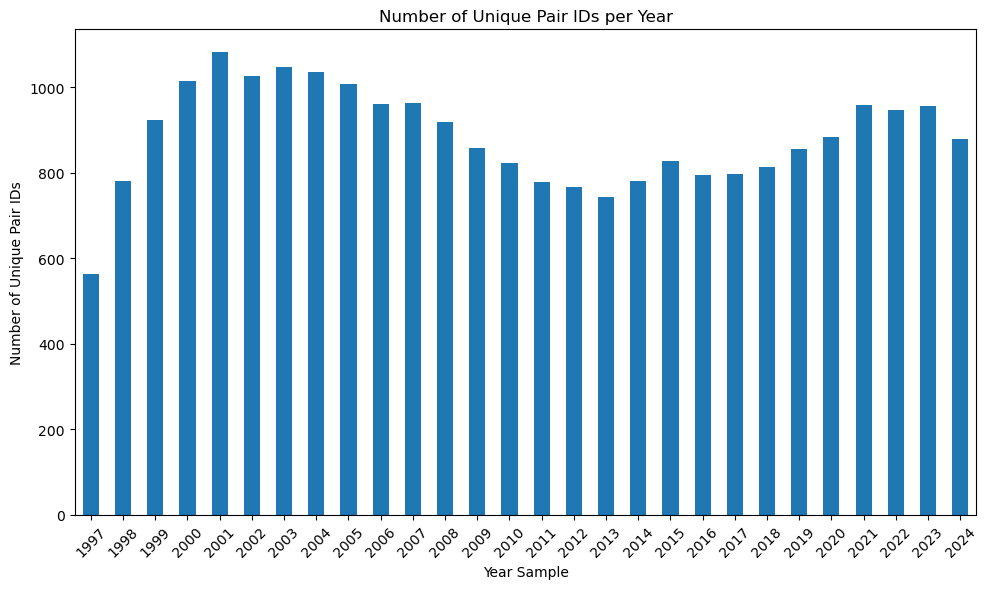

In [4]:
# Step 2: Ensure 'date_sample' is in datetime format
pairs_data['date_sample'] = pd.to_datetime(pairs_data['date_sample'])

# Step 3: Extract the year from 'date_sample'
pairs_data['year_sample'] = pairs_data['date_sample'].dt.year

# Step 4: Group by 'year_sample' and count unique 'pair_id'
unique_pairs_per_year = pairs_data.groupby('year_sample')['pair_id'].nunique()

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
unique_pairs_per_year.plot(kind='bar')
plt.title('Number of Unique Pair IDs per Year')
plt.xlabel('Year Sample')
plt.ylabel('Number of Unique Pair IDs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
pairs_data = pairs_data.dropna(subset=['cshoc'])
pairs_id = list(set(pairs_data['pair_id'].to_list()))
print(f'Number of pairs: {len(pairs_id)}')

Number of pairs: 4270


In [6]:
pairs_data = pairs_data.dropna(subset=['cshoc_o'])
pairs_id = list(set(pairs_data['pair_id'].to_list()))
print(f'Number of pairs: {len(pairs_id)}')

Number of pairs: 4266


In [7]:
pairs_data = pairs_data[~(pairs_data['cusip6']==pairs_data['cusip6_o'])]
pairs_id = list(set(pairs_data['pair_id'].to_list()))
print(f'Number of pairs: {len(pairs_id)}')

Number of pairs: 4143


In [8]:
pairs_data = pairs_data[~(pairs_data['shares_agg']=='None')]
pairs_id = list(set(pairs_data['pair_id'].to_list()))
print(f'Number of pairs: {len(pairs_id)}')

Number of pairs: 4093


In [9]:
pairs_data['mkt_cshoc'] = pairs_data['cshoc']*pairs_data['prccd']
pairs_data['mkt_cshoc_o'] = pairs_data['cshoc_o']*pairs_data['prccd_o']
pairs_data['stake'] = pairs_data['shares_agg'].str.replace(',', '').astype(float)*pairs_data['prccd']
pairs_data['shares_percentage'] = pairs_data['shares_percentage'].replace('None', 0).astype(float)/100
pairs_data['stake_cshoc'] = pairs_data['shares_percentage']*pairs_data['mkt_cshoc']
pairs_data['stake_mkvaltq'] = pairs_data['shares_percentage']*pairs_data['mkvaltq']
pairs_data['stake_mkvalt'] = pairs_data['shares_percentage']*pairs_data['mkvalt']
pairs_data['stub'] = pairs_data['mkt_cshoc_o']-pairs_data['stake']
pairs_data['stub_cshoc'] = pairs_data['mkt_cshoc_o']-pairs_data['stake_cshoc']
pairs_data['stub_mkvaltq'] = pairs_data['mkvaltq_o']-pairs_data['stake_mkvaltq']
pairs_data['net_equity_q'] = pairs_data['ceqq_o']-pairs_data['ceqq']*pairs_data['shares_percentage']
pairs_data['stub_2'] = pairs_data['mkt_cshoc_o']-pairs_data['stake'] - pairs_data['net_equity_q']*10**6
pairs_data['stub_cshoc_2'] = pairs_data['mkt_cshoc_o']-pairs_data['stake_cshoc'] - pairs_data['net_equity_q']*10**6
pairs_data['stub_mkvaltq_2'] = pairs_data['mkvaltq_o']-pairs_data['stake_mkvaltq'] - pairs_data['net_equity_q']

pairs_data.head()

,date_sample,pair_id,min_date_sample,cusips,cik_owner,company,owner,cik_company,file_type,date_issue,...,stake_cshoc,stake_mkvaltq,stake_mkvalt,stub,stub_cshoc,stub_mkvaltq,net_equity_q,stub_2,stub_cshoc_2,stub_mkvaltq_2
5096,2018-07-02,-2147021126,2018-07-02,Y7545W109,1737706,Seadrill Partners LLC,Seadrill Ltd,1553467,13D,2018-07-10,...,9.326568e+07,NaN,NaN,-4.181797e+07,-4.180474e+07,NaN,NaN,NaN,NaN,NaN
5097,2018-07-02,-2147021126,2018-07-02,Y7545W109,1737706,Seadrill Partners LLC,Seadrill Ltd,1553467,13D,2018-07-10,...,9.326568e+07,NaN,NaN,-4.181797e+07,-4.180474e+07,NaN,NaN,NaN,NaN,NaN
5098,2018-07-03,-2147021126,2018-07-02,Y7545W109,1737706,Seadrill Partners LLC,Seadrill Ltd,1553467,13D,2018-07-10,...,9.615560e+07,NaN,NaN,1.753831e+09,1.753844e+09,NaN,NaN,NaN,NaN,NaN
5099,2018-07-05,-2147021126,2018-07-02,Y7545W109,1737706,Seadrill Partners LLC,Seadrill Ltd,1553467,13D,2018-07-10,...,1.016727e+08,NaN,NaN,1.998313e+09,1.998327e+09,NaN,NaN,NaN,NaN,NaN
5100,2018-07-06,-2147021126,2018-07-02,Y7545W109,1737706,Seadrill Partners LLC,Seadrill Ltd,1553467,13D,2018-07-10,...,1.021982e+08,NaN,NaN,2.050787e+09,2.050802e+09,NaN,NaN,NaN,NaN,NaN


# For each date and parent keep the largest market capitalization
pairs_data = pairs_data.dropna(subset=['pair_id', 'date_sample', 'parent_mkt'])
pairs_data = pairs_data.loc[pairs_data.groupby(['pair_id', 'date_sample'])['parent_mkt'].idxmax()]

# Reset index for better readability
pairs_data = pairs_data.reset_index(drop=True)

In [10]:
nsv_data = pairs_data[(pairs_data['stub']<0)]
pairs_id = list(set(nsv_data['pair_id'].to_list()))
print(f'Number of NSV (stub<0): {len(pairs_id)}')
nsv_data = pairs_data[(pairs_data['stub_cshoc']<0)]
pairs_id = list(set(nsv_data['pair_id'].to_list()))
print(f'Number of NSV (stub_cshoc<0): {len(pairs_id)}')
nsv_data = pairs_data[(pairs_data['stub_mkvaltq']<0)]
pairs_id = list(set(nsv_data['pair_id'].to_list()))
print(f'Number of NSV (stub_mkvaltq<0): {len(pairs_id)}')

nsv_data = pairs_data[(pairs_data['stub_2']<0)]
pairs_id = list(set(nsv_data['pair_id'].to_list()))
print(f'Number of NSV (stub_2<0): {len(pairs_id)}')
nsv_data = pairs_data[(pairs_data['stub_cshoc_2']<0)]
pairs_id = list(set(nsv_data['pair_id'].to_list()))
print(f'Number of NSV (stub_cshoc_2<0): {len(pairs_id)}')
nsv_data = pairs_data[(pairs_data['stub_mkvaltq_2']<0)]
pairs_id = list(set(nsv_data['pair_id'].to_list()))
print(f'Number of NSV (stub_mkvaltq_2<0): {len(pairs_id)}')

Number of NSV (stub<0): 520
Number of NSV (stub_cshoc<0): 495
Number of NSV (stub_mkvaltq<0): 54
Number of NSV (stub_2<0): 935
Number of NSV (stub_cshoc_2<0): 933
Number of NSV (stub_mkvaltq_2<0): 320


In [41]:
nsv_data = pairs_data[(pairs_data['stub']<0)|
                      (pairs_data['stub_cshoc']<0)|
                      (pairs_data['stub_mkvaltq']<0)|
                      (pairs_data['stub_2']<0)|
                      (pairs_data['stub_cshoc_2']<0)|
                      (pairs_data['stub_mkvaltq_2']<0)]
pairs_id = list(set(nsv_data['pair_id'].to_list()))
print(f'Number of NSV (All): {len(pairs_id)}')
nsv_data = pairs_data[pairs_data['pair_id'].isin(pairs_id)]
nsv_data.to_csv('nsv_data.csv', index=False)

Number of NSV (All): 1257


In [68]:
def filter_pairs_data(pairs_data, mkt_cshoc_min=None, mkt_cshoc_max=None):
    """
    Filters the pairs_data DataFrame to include only rows where the mean 'mkt_cshoc' for each pair_id
    is between mkt_cshoc_min and mkt_cshoc_max (if provided), and both 'stub_cshoc' and 'stub' are below zero.
    
    Parameters:
    pairs_data (pd.DataFrame): The input DataFrame containing the data.
    mkt_cshoc_min (float, optional): The minimum mean value for the 'mkt_cshoc' filter.
    mkt_cshoc_max (float, optional): The maximum mean value for the 'mkt_cshoc' filter.
    
    Returns:
    pd.DataFrame: A DataFrame containing the filtered rows.
    """
    # Group by 'pair_id' and calculate the mean 'mkt_cshoc' for each group
    mean_mkt_cshoc = pairs_data.groupby('pair_id')['mkt_cshoc'].mean()
    
    # Apply the 'mkt_cshoc' filter conditions if provided
    if mkt_cshoc_min is not None:
        mean_mkt_cshoc = mean_mkt_cshoc[mean_mkt_cshoc >= mkt_cshoc_min]
    if mkt_cshoc_max is not None:
        mean_mkt_cshoc = mean_mkt_cshoc[mean_mkt_cshoc <= mkt_cshoc_max]
    
    # Select only the 'pair_id' that meet the conditions
    pair_ids = mean_mkt_cshoc.index.unique()
    
    # Filter the original data to only include the selected pair_ids
    filtered_pairs_data = pairs_data[pairs_data['pair_id'].isin(pair_ids)]
    
    # Apply the basic filter conditions for 'stub_cshoc' and 'stub'
    final_filtered_data = filtered_pairs_data[
        (filtered_pairs_data['stub_cshoc'] < 0) & 
        (filtered_pairs_data['stub'] < 0)
    ]
    
    # Number of pairs
    final_pair_ids = final_filtered_data['pair_id'].unique()
    print(f'Number of pairs: {len(final_pair_ids)}')
    
    # Result
    result_data = pairs_data[pairs_data['pair_id'].isin(final_pair_ids)] 
    
    return result_data

def filter_pairs_data_plus(pairs_data, mkt_cshoc_min=None, mkt_cshoc_max=None):
    
    nsv_data = filter_pairs_data(pairs_data, 
                                 mkt_cshoc_min=mkt_cshoc_min, 
                                 mkt_cshoc_max=mkt_cshoc_max)
    
    # Remove any potential NaN values before applying idxmax
    nsv_data = nsv_data.dropna(subset=['stub'])
    
    idx = nsv_data.groupby(['pair_id', 'date_sample'])['stub'].idxmax()
    idx = idx.dropna()  # Ensure no NaN values in idx
    
    nsv_data = nsv_data.loc[idx].reset_index(drop=True)
    filtered_pairs_data = filter_pairs_data(nsv_data, mkt_cshoc_min=None, mkt_cshoc_max=None)
    
    # Step 1: Get the first and last row for each pair_id
    first_dates = filtered_pairs_data.loc[filtered_pairs_data.groupby('pair_id')['date_sample'].idxmin()]
    last_dates = filtered_pairs_data.loc[filtered_pairs_data.groupby('pair_id')['date_sample'].idxmax()]
    
    # Step 2: Get the row with the minimum 'stub' value for each pair_id
    min_stub_values = filtered_pairs_data.loc[filtered_pairs_data.groupby('pair_id')['stub'].idxmin()]
    
    # Concatenate the results and drop duplicates
    result_data = pd.concat([first_dates, min_stub_values, last_dates]).drop_duplicates()
    result_data = result_data.sort_values(by=['pair_id', 'date_sample']).reset_index(drop=True)

    return result_data

Number of pairs: 77
Number of pairs: 46


In [78]:
nsv_description = filter_pairs_data_plus(pairs_data=pairs_data,
                                         mkt_cshoc_min=0, 
                                         mkt_cshoc_max=200*10**6)
nsv_description.to_csv('nsv_description.csv')

Number of pairs: 184
Number of pairs: 150
